# Comparison of the Ideal Gas and Non-Ideal Gas Equations through Helium's Behaviour at Various Temperatures

In this notebook, I will use data from three helium isotherms to look at how helium behaves at various temperatures and whether it follows ideal or non-ideal gas behaviour more closely. I will then calculate values for Van der Waals constants and compare them to literature. The data was obtained from two sources: [Physical Journal Review Archive](https://journals.aps.org/pr/abstract/10.1103/PhysRev.170.213) and [Physica Amsterdam](https://www.sciencedirect.com/science/article/abs/pii/S0031891441903154?via%3Dihub).

The ideal gas equation is an equation that brings together Boyle's Law, Charles' Law and Avogadro's Law to describe the behaviour of ideal gases. It takes the form of: $$ pV=nRT $$ 

where p=pressure in Pa, V= volume in m<sup>3</sup>, n= number of moles, R= gas constant in J/K/mol and T= temperature in K.

Four assumptions are made for this law to accurately describe the behaviour of a gas:
  1. The volume of the gas molecules is negligible.
  2. Collisions between the molecules are perfectly elastic.
  3. The molecules have no intermolecular forces.
  4. The molecules move randomly.

Gases follow most closely this behaviour at either high temperatures or low pressures.This is because at low pressures and/or high temperatures, molecules experience less intermolecular forces and the space between them becomes less significant.

The Ideal Gas equation is a theoretical expression and in reality, gases do not follow this exact behaviour. This is mostly because the volume of molecules in the gases are not negligible and molecules do interact with one another. An equation which more accurately describes the behaviour of real gases is: 

$$ (p+\frac{an^{2}}{V^{2}})(V-nb)=nRT$$ 

where a is a constant specific to the gas which accounts for the attraction between the molecules in L<sup>2</sup>bar/m<sup>3</sup>/mol and b is another gas-specific constant which accounts for the volume of the molecules in L/mol. 

Both of the equations can be rewritten in a linear form with the x-axis as volume and the y-axis as pressure. They can now be used as models for the data. The moles are assumed to be equal to 1 and so the molar term is removed: $$p=\frac{RT}{V}$$
$$p=\frac{RT}{V-b}-\frac{a}{V^{2}}$$


## Importing and graphing the data

Three sets of data were chosen at temperatures of 5.314 K, 273.15 K and 423.15 K to show the behaviour of gases at various temperatures. From the theory mentioned previously, two behaviours can be predicted:
  1. The best fit between the model and the experimental data will be seen at higher temperatures. 
  2. The non-ideal gas model will be a better fit to the experimental data than the ideal gas model.

The data is inputted below with either l, m or h in their title to describe the low temperature, medium or high temperature, respectively. Pressure is in Pa, volume is in m<sup>3</sup>/kg. The units of volume indicate that they are values for specific volume rather than volume. In order to convert specific volume to volume, the data is multiplied by 4.002602 (helium's atomic mass) and divided by a 1000.

In [1]:
import numpy as np

In [2]:
pressure_l= np.array([222000,231900,238600,242100,244500,246100,247300,248300,249200,250200,251400,252800,254400])
specific_volume_l= np.array([0.027678,0.024149,0.021372,0.019639,0.018172,0.017039,0.016008,0.015113,0.014312,0.01362,0.012992,0.012478,0.012053])
volume_l=specific_volume_l*4.002602/1000

pressure_m=np.array([921500,1142200,1425900,1787300,2209100,2707400,3194500,3558500,3674500,4321900,5302200,6510900,7967700,9930800,12337000,15418000,19233000])
specific_volume_m= np.array([0.61865,0.4997,0.40086,0.32038,0.25978,0.21251,0.18055,0.16238,0.15735,0.13421,0.10994,0.090066,0.074127,0.060038,0.048886,0.039682,0.032368])
volume_m=specific_volume_m*4.002602/1000

pressure_h= np.array([1427100,1768800,2207900,2767400,3419800,4190500,4943500,5506500,5685200,6685500,8200100,10066000,12313000,15338000,19040000,23767000,29602000]) 
specific_volume_h= np.array([0.61865,0.4997,0.40086,0.32038,0.25978,0.21251,0.18055,0.16238,0.15735,0.13421,0.10994,0.090066,0.074127,0.060038,0.048886,0.039682,0.032368])
volume_h=specific_volume_h*4.002602/1000

The data is graphed below with blue representing the low temperature isotherm, green representing the medium temperature isotherm and red representing the high temperature isotherm.

In [3]:
import matplotlib.pyplot as plt

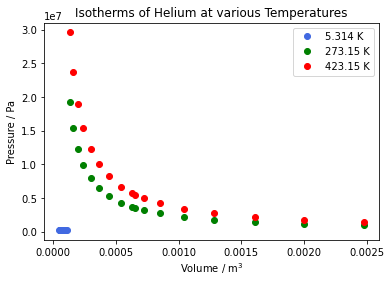

In [6]:
plt.plot(volume_l, pressure_l, 'o', color='royalblue', label='5.314 K')
plt.plot(volume_m,pressure_m,'o', color='green', label='273.15 K')
plt.plot(volume_h,pressure_h, 'ro', label='423.15 K')
leg= plt.legend()
plt.title('Isotherms of Helium at various Temperatures')
plt.xlabel('Volume / m$^3$')
plt.ylabel('Pressure / Pa')
plt.show()

273.15 K and 423.15 K show similar curves and a similar spread of data. 5.314 K was graphed again below as its behaviour was not well described by the axes above.

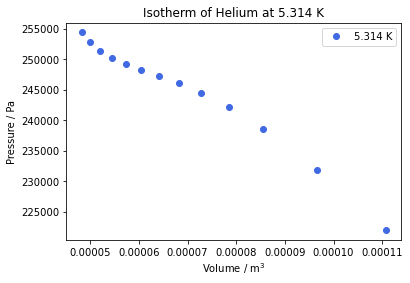

In [7]:
plt.plot(volume_l, pressure_l,'o', color='royalblue', label='5.314 K')
leg= plt.legend()
plt.title('Isotherm of Helium at 5.314 K')
plt.xlabel('Volume / m$^3$')
plt.ylabel('Pressure / Pa')
plt.show()

## Defining the models for Ideal and Non-Ideal Gases

Two functions are written to define the ideal gas model and the non-ideal gas model (also known as Van der Waals model). They will then be used to calculate lines of best fit on the experimental data.

In [8]:
def ideal_gas (v, R, T):
    '''
    Pressures of 1 mole of helium at a given temperature calculated from the ideal gas equation.
    
    Args: 
        v (array): volume of gas in m**3.
        R (float): gas constant in J/K.
        T (float): temperature of system in K.
    Returns:
        (array): pressure at varying volumes in Pa.
    '''
    return (R*T)/v

In [9]:
def non_ideal_gas(v, R, T, a, b):
    '''
    The pressure of 1 mole of helium at a given temperature calculated from the non-ideal gas equation.
    
    Args: 
        v (array): volume of gas in m**3.
        R (float): gas constant in J/K/mol.
        T (float): temperature of system in K.
        a (float): constant for helium in L2 Pa/m**3/mol.
        b (float): constant for helium in L/mol.
    Returns:
        (array): pressure at varying volumes in Pa.
    '''
    return ((R*T)/(v-b))-(a/(v**2))

## Graphing the high temperature isotherm

The line of best fit was made by using linspace to generate a 1000 x-coordinates (volume_h_fit) ranging from the experimental data's lowest and highest values. The models described above were then used to calculate the y-values associated with the x-coordinates. In the case of the non-ideal gas model, literature values for a (0.00346) and b (0.0000238) were used as an initial guess for the fit. The models were then graphed on top of the experimental data to visually determine their fit.

In [15]:
from numpy import linspace
from scipy.constants import R

In [16]:
volume_h_fit= linspace(0.00247621,0.00012956,1000)
pressure_h_ideal= ideal_gas(volume_h_fit, R, 423.15)
pressure_h_non_ideal=non_ideal_gas(volume_h_fit, R, 423.15, 0.00346, 0.0000238)

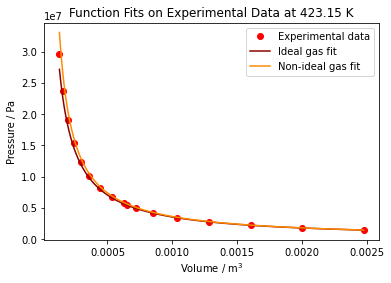

In [17]:
plt.plot(volume_h,pressure_h, 'ro', label='Experimental data')
plt.plot(volume_h_fit,pressure_h_ideal, color='darkred',label='Ideal gas fit')
plt.plot(volume_h_fit,pressure_h_non_ideal, color='darkorange',label='Non-ideal gas fit')
leg= plt.legend()
plt.title('Function Fits on Experimental Data at 423.15 K')
plt.xlabel('Volume / m$^3$')
plt.ylabel('Pressure / Pa')
plt.show()

As expected, both the ideal gas equation and the non-ideal gas equations give good visual fits of the data due to the high temperature. The ideal gas model's fit cannot be further improved because it does not contain variable values unlike the non-ideal gas model. In order to calculate approximate values of a and b, the non-ideal gas fit is minimised. This is done by defining a new function, chi-squared, and using it to calculate the best fit by changing the constants a and b. An issue with precision loss was initially found when running the calculations and so the Nelder-Mead method was added.

In [31]:
def chi_squared(x, v, experimental_data):
    '''
    Determine the chi-squared value for the non-ideal gas fit.
    
    Args:
        x (list): Variable parameters a and b.
        v (float): volume in m**3.
        experimental_data (float): The experimental pressure data in Pa.
    Returns:
        (float): chi**2 value.
    '''
    a=x[0]
    b=x[1]
    return np.sum((experimental_data-non_ideal_gas(v, R, T, a, b))**2)

In [32]:
from scipy.optimize import minimize

In [33]:
T=423.15
result_h = minimize(chi_squared, [0.003, 0.00004], method = 'Nelder-Mead',args=(volume_h, pressure_h))

In [34]:
print(result_h)

 final_simplex: (array([[-1.27985309e-02,  7.56521285e-06],
       [-1.27985297e-02,  7.56521319e-06],
       [-1.27985378e-02,  7.56521111e-06]]), array([15545538.64158359, 15545538.64161399, 15545538.64161968]))
           fun: 15545538.641583586
       message: 'Optimization terminated successfully.'
          nfev: 176
           nit: 92
        status: 0
       success: True
             x: array([-1.27985309e-02,  7.56521285e-06])


The minimised non-ideal gas model is graphed below along with the non-ideal gas model. As expected, it shows a better fit than the non-ideal gas model.

In [35]:
pressure_h_non_ideal_minimised= non_ideal_gas(volume_h_fit, R, 423.15, result_h.x[0], result_h.x[1])

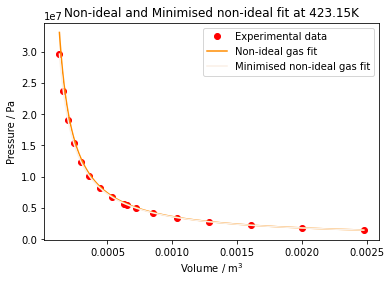

In [40]:
plt.plot(volume_h,pressure_h, 'ro', label='Experimental data')
plt.plot(volume_h_fit,pressure_h_non_ideal, color='darkorange', label='Non-ideal gas fit')
plt.plot(volume_h_fit,pressure_h_non_ideal_minimised, color='linen',label='Minimised non-ideal gas fit')
leg= plt.legend()
plt.title ('Non-ideal and Minimised non-ideal fit at 423.15K')
plt.xlabel('Volume / m$^3$')
plt.ylabel('Pressure / Pa')
plt.show()

## Graphing the room temperature isotherm

The same procedure can be repeated for the low and room temperatures using the already written functions.

In [41]:
volume_m_fit= linspace(0.00247621,0.00012956,1000)
pressure_m_ideal= ideal_gas(volume_m_fit, R, 273.15)
pressure_m_non_ideal=non_ideal_gas(volume_m_fit, R, 273.15, 0.00346, 0.0000238)

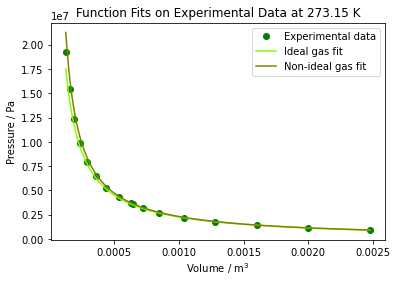

In [42]:
plt.plot(volume_m,pressure_m, 'o',color='green', label='Experimental data')
plt.plot(volume_m_fit,pressure_m_ideal, color='chartreuse',label='Ideal gas fit')
plt.plot(volume_m_fit,pressure_m_non_ideal, color='olive',label='Non-ideal gas fit')
leg= plt.legend()
plt.title('Function Fits on Experimental Data at 273.15 K')
plt.xlabel('Volume / m$^3$')
plt.ylabel('Pressure / Pa')
plt.show()

In [43]:
T=273.15
result_m = minimize(chi_squared, [0.003, 0.00004],method = 'Nelder-Mead', args=(volume_m, pressure_m))

In [44]:
print(result_m)

 final_simplex: (array([[-4.82076329e-03,  9.68255846e-06],
       [-4.82076122e-03,  9.68255928e-06],
       [-4.82075803e-03,  9.68256048e-06]]), array([226503.18898037, 226503.18899204, 226503.18902487]))
           fun: 226503.18898036573
       message: 'Optimization terminated successfully.'
          nfev: 157
           nit: 83
        status: 0
       success: True
             x: array([-4.82076329e-03,  9.68255846e-06])


In [45]:
pressure_m_non_ideal_minimised= non_ideal_gas(volume_m_fit, R, 273.15, result_m.x[0],  result_m.x[1])

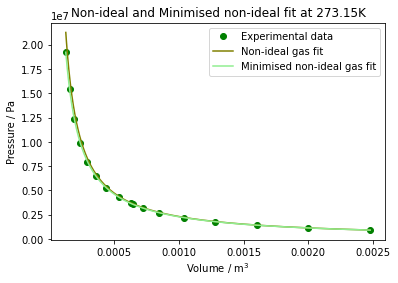

In [57]:
plt.plot(volume_m,pressure_m, 'o',color='green', label='Experimental data')
plt.plot(volume_m_fit,pressure_m_non_ideal, color='olive', label='Non-ideal gas fit')
plt.plot(volume_m_fit,pressure_m_non_ideal_minimised, color='lightgreen',label='Minimised non-ideal gas fit')
leg= plt.legend()
plt.title('Non-ideal and Minimised non-ideal fit at 273.15K')
plt.xlabel('Volume / m$^3$')
plt.ylabel('Pressure / Pa')
plt.show()

## Graphing the low temperature isotherm

In [48]:
volume_l_fit= linspace(1.10784018e-04,4.82433619e-05,1000)
pressure_l_ideal= ideal_gas(volume_l_fit, R, 5.314)
pressure_l_non_ideal=non_ideal_gas(volume_l_fit, R, 5.314, 0.00346, 0.0000238)

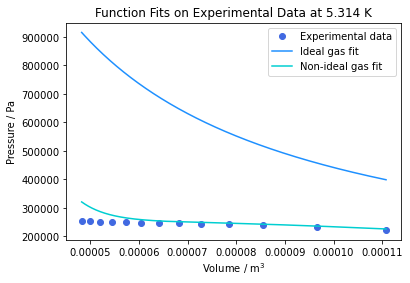

In [49]:
plt.plot(volume_l,pressure_l, 'o',color='royalblue', label='Experimental data')
plt.plot(volume_l_fit,pressure_l_ideal, color='dodgerblue',label='Ideal gas fit')
plt.plot(volume_l_fit,pressure_l_non_ideal, color='darkturquoise',label='Non-ideal gas fit')
leg= plt.legend()
plt.xlabel('Volume / m$^3$')
plt.ylabel('Pressure / Pa')
plt.title('Function Fits on Experimental Data at 5.314 K')
plt.show()

The ideal gas fit is a lot further from the experimental data then the non-ideal gas fit. This is expected as the low temperature means the gas behaves a lot less ideally than previously. Graphing only the non-ideal gas fit gives a better visual of the data.

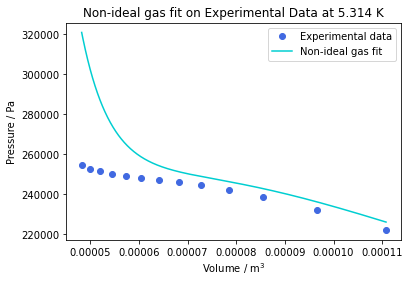

In [51]:
plt.plot(volume_l,pressure_l, 'o',color='royalblue', label='Experimental data')
plt.plot(volume_l_fit,pressure_l_non_ideal, color='darkturquoise',label='Non-ideal gas fit')
leg= plt.legend()
plt.xlabel('Volume / m$^3$')
plt.ylabel('Pressure / Pa')
plt.title('Non-ideal gas fit on Experimental Data at 5.314 K')
plt.show()

In [52]:
T=5.314
result_l = minimize(chi_squared, [0.003, 0.00004],method = 'Nelder-Mead', args=(volume_l, pressure_l))

In [53]:
print(result_l)

 final_simplex: (array([[3.29959779e-03, 2.19257138e-05],
       [3.29959780e-03, 2.19257140e-05],
       [3.29959772e-03, 2.19257134e-05]]), array([2.46329555e+08, 2.46329555e+08, 2.46329555e+08]))
           fun: 246329555.27194703
       message: 'Optimization terminated successfully.'
          nfev: 133
           nit: 70
        status: 0
       success: True
             x: array([3.29959779e-03, 2.19257138e-05])


In [54]:
pressure_l_non_ideal_minimised= non_ideal_gas(volume_l_fit, R, 5.314, result_l.x[0],  result_l.x[1])

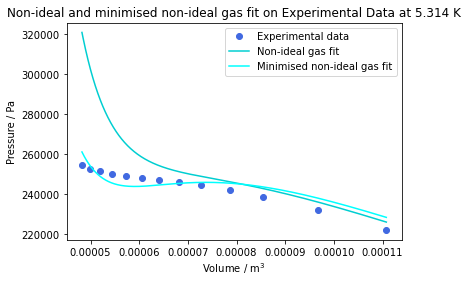

In [55]:
plt.plot(volume_l,pressure_l, 'o',color='royalblue', label='Experimental data')
plt.plot(volume_l_fit,pressure_l_non_ideal, color='darkturquoise',label='Non-ideal gas fit')
plt.plot(volume_l_fit,pressure_l_non_ideal_minimised, color='cyan',label='Minimised non-ideal gas fit')
leg= plt.legend()
plt.xlabel('Volume / m$^3$')
plt.ylabel('Pressure / Pa')
plt.title('Non-ideal and minimised non-ideal gas fit on Experimental Data at 5.314 K')
plt.show()

At low temperature, the minimised fit is a lot better and the minimisation of a and b makes a much greater difference than at higher temperatures. The corrections arising from a and b become much more important because the molecules show more Van der Waals interactions due to them moving around slower. 

## Comparison of a and b Values and Conclusion

The table below displays the calculated values of a and b relative to the literature values ([Georgia State University](http://hyperphysics.phy-astr.gsu.edu/hbase/Kinetic/waal.html)). As it can be seen at the lowest temperature, a and b were quite similar to the literature values, showing that at low temperatures, helium does not behave ideally and so a and b are needed to correct for the volume and the attraction displayed by the molecules. 

At higher temperatures, values of a and b were further from the literature values. In the case of a, the best fit values were calculated as negative, indicating that the constant was not needed to correct the attractive forces of particles towards one another. In the case of b, the values were off by a magnitude of 10 indicating that the non-ideal gas equation overcorrects the volume value. The fact that b is still greater than 1 indicates that a correction is needed even for the high temperature values.

In conclusion, an increase in temperature results in the attractive forces between molecules in a gas being close to negligible rather quickly, however the volumes of the molecules require higher temperatures to be completely negligible. As expected, with higher temperatures, less correction of behaviour is needed as can be seen by the decreasing values of a and b when temperatures rise.

<table>
  <thead>
    <tr>
      <th>Temperature / K</th> 
      <th>a / x10<sup>-3</sup></th>
      <th>b / x10<sup>-6</sup></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Literature Values</td>
      <td>3.46</td>
      <td>23.8</td>
     </tr> 
     <tr>
      <td>5.314</td>
      <td>3.30</td>
      <td>21.9</td>
    </tr>
    <tr>
      <td>273.15</td>
      <td>-4.82</td>
      <td>9.68</td>
    </tr>
    <tr>  
      <td>423.15</td>
      <td>-12.8</td>
      <td>7.57</td>
    </tr>
  </tbody>
</table>